In [1]:
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
import pandas as pd
import random
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

Using TensorFlow backend.


In [7]:
datadir = 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth', -1)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


In [8]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,center_2019_07_24_13_27_37_710.jpg,left_2019_07_24_13_27_37_710.jpg,right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,center_2019_07_24_13_27_37_815.jpg,left_2019_07_24_13_27_37_815.jpg,right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,center_2019_07_24_13_27_37_914.jpg,left_2019_07_24_13_27_37_914.jpg,right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,center_2019_07_24_13_27_38_015.jpg,left_2019_07_24_13_27_38_015.jpg,right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,center_2019_07_24_13_27_38_118.jpg,left_2019_07_24_13_27_38_118.jpg,right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


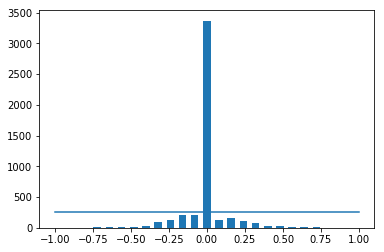

In [9]:
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

removed : 3119
total : 4676
remaining : 1557


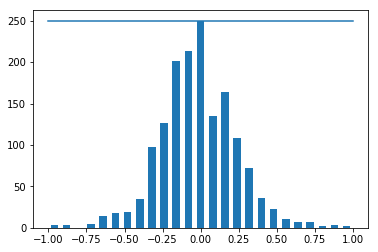

In [10]:
remove_list = []
for j in range(num_bins):
    list_a = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
           list_a.append(i)  
    list_a = shuffle(list_a)
    list_a = list_a[samples_per_bin:]
    remove_list.extend(list_a)
    
    
print('removed : ' + str(len(remove_list)))
print('total : ' + str(len(data)))
data.drop(data.index[remove_list], inplace=True)
print('remaining : ' + str(len(data)))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))